In [1]:
#Perform the following operations using Python
#1. Scan all variables for missing values and inconsistencies. If there are missing values and/or inconsistencies, use the following techniques to deal with them. 
#a)Delete rows or column b)replace missing values with mean c)replace missing values with mode d)replace missing values with median
#2. Apply data transformations on at least one of the variables. The purpose of this transformation should be one of the following reasons: to change the scale for better understanding of the variable, to convert a non-linear relation into a linear one, or to decrease the skewness and convert the distribution into a normal distribution.#

In [126]:
import pandas as pd
import numpy as np

In [127]:
df=pd.read_csv("StudentsPerformance_modified.csv")

In [128]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,88.0
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0


In [129]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99.0,95.0
996,male,group C,high school,free/reduced,none,62,55.0,55.0
997,female,group C,high school,free/reduced,completed,59,71.0,65.0
998,female,group D,some college,standard,completed,68,78.0,77.0
999,female,group D,some college,free/reduced,none,77,86.0,86.0


In [130]:
df.describe()

,reading score,writing score
count,994.000000,991.000000
mean,68.008048,69.487386
std,16.602270,29.563757
min,3.000000,10.000000
25%,58.000000,57.000000
50%,69.500000,69.000000
75%,79.000000,79.000000
max,100.000000,567.000000


In [131]:
df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                      object
reading score                  float64
writing score                  float64
dtype: object

In [132]:
df.shape

(1000, 8)

In [133]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     8
reading score                  6
writing score                  9
dtype: int64

In [134]:
df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                      object
reading score                  float64
writing score                  float64
dtype: object

In [135]:
#fill the numeric reading score and writing score with mean and median respectively
df['reading score'].fillna(df['reading score'].mean(),inplace=True)
df['writing score'].fillna(df['writing score'].median(),inplace=True)

In [136]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     8
reading score                  0
writing score                  0
dtype: int64

In [137]:
df['math score'].fillna(df['math score'].mode()[0],inplace=True)


In [138]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [139]:
df['math score'].unique()


array(['72', '69', '90', '47', '76', '71', '88', '40', '64', '38', '58',
       '65', '78', '50', '74', '73', '67', '70', '62', '63', '56', '81',
       '75', '57', '55', '53', '59', '66', '82', '77', '33', '52', '0',
       '79', '39', '45', '60', '61', '41', '49', '44', '30', '80', '42',
       '27', '43', '68', '85', '98', '87', '54', '51', '99', '84', '91',
       '83', '89', '22', '100', '96', '94', '46', '97', '48', '35', '34',
       '86', '92', '37', '28', '24', '113', '123', '?', '-89', '26',
       '334', '95', '36', '29', '32', '93', '19', '23', '8'], dtype=object)

In [140]:
for i,value in enumerate(df['math score']):
    if value=='?':
        df['math score'][i]=float('NaN')

/tmp/ipykernel_11187/2443059879.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['math score'][i]=float('NaN')


In [141]:
df.isna().sum()

gender                          0
race/ethnicity                  0
parental level of education     0
lunch                           0
test preparation course         0
math score                     35
reading score                   0
writing score                   0
dtype: int64

In [142]:
df=df.dropna(subset=['math score'])

In [143]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [144]:
df.skew(axis = 0, skipna = True)

/tmp/ipykernel_11187/2838370498.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew(axis = 0, skipna = True)


math score        2.527323
reading score    -0.832839
writing score    11.432116
dtype: float64

/tmp/ipykernel_11187/2354272343.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['math score'])


<AxesSubplot: xlabel='math score', ylabel='Density'>

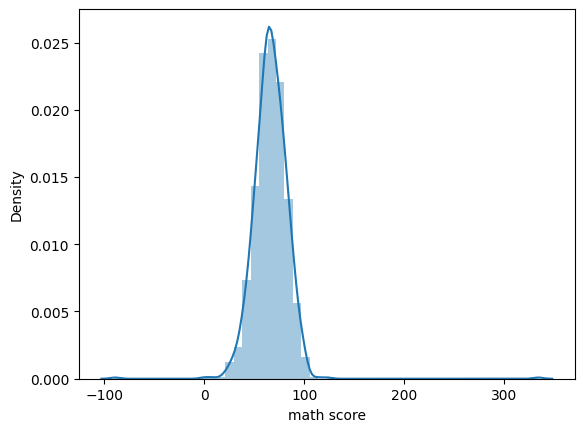

In [145]:
sns.distplot(df['math score'])

In [146]:
#object to float
df['math score']=df['math score'].astype('float')


In [147]:
min1=df['math score'].min()
max1=df['math score'].max()
for i,value in enumerate(df['math score']):
    df['math score'][i]=((value-min1)/(max1-min1))*(1-0)+0

/tmp/ipykernel_11187/3192112647.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['math score'][i]=((value-min1)/(max1-min1))*(1-0)+0
/tmp/ipykernel_11187/3192112647.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['math score'][i]=((value-min1)/(max1-min1))*(1-0)+0
/tmp/ipykernel_11187/3192112647.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['math score'][i]=((value-min1)/(max1-min1))*(1-0)+0
/tmp/ipykernel_11187/3

In [148]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,0.380615,72.0,74.0
1,female,group C,some college,standard,completed,0.373522,90.0,88.0
2,female,group B,master's degree,standard,none,0.423168,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,0.321513,57.0,44.0
4,male,group C,some college,standard,none,0.390071,78.0,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.000000,99.0,95.0
996,male,group C,high school,free/reduced,none,62.000000,55.0,55.0
997,female,group C,high school,free/reduced,completed,59.000000,71.0,65.0
998,female,group D,some college,standard,completed,68.000000,78.0,77.0


In [149]:
df.skew(axis = 0, skipna = True)

/tmp/ipykernel_11187/2838370498.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew(axis = 0, skipna = True)


math score        5.335957
reading score    -0.832839
writing score    11.432116
dtype: float64

In [150]:
import seaborn as sns

/tmp/ipykernel_11187/2354272343.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['math score'])


<AxesSubplot: xlabel='math score', ylabel='Density'>

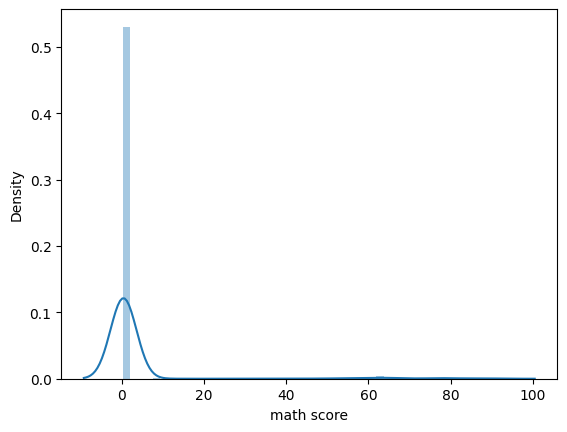

In [151]:
sns.distplot(df['math score'])

/tmp/ipykernel_11187/232294105.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['reading score'])


<AxesSubplot: xlabel='reading score', ylabel='Density'>

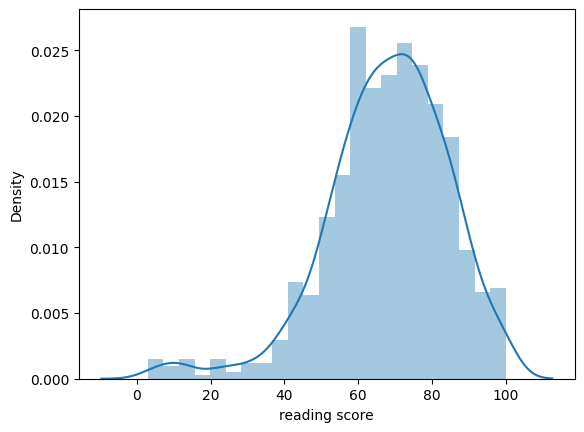

In [152]:
sns.distplot(df['reading score'])

In [153]:
#normalizing 
min1=df['reading score'].min()
max1=df['reading score'].max()
for i,value in enumerate(df['reading score']):
    df['reading score'][i]=((value-min1)/(max1-min1))*(1-0)+0
df

/tmp/ipykernel_11187/2281850644.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reading score'][i]=((value-min1)/(max1-min1))*(1-0)+0
/tmp/ipykernel_11187/2281850644.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reading score'][i]=((value-min1)/(max1-min1))*(1-0)+0
/tmp/ipykernel_11187/2281850644.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reading score'][i]=((value-min1)/(max1-min1))*(1-0)+0
/tmp/ipykerne

/tmp/ipykernel_11187/2281850644.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reading score'][i]=((value-min1)/(max1-min1))*(1-0)+0
/tmp/ipykernel_11187/2281850644.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reading score'][i]=((value-min1)/(max1-min1))*(1-0)+0
/tmp/ipykernel_11187/2281850644.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reading score'][i]=((value-min1)/(max1-min1))*(1-0)+0
/tmp/ipykerne

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,0.380615,0.711340,74.0
1,female,group C,some college,standard,completed,0.373522,0.896907,88.0
2,female,group B,master's degree,standard,none,0.423168,0.948454,93.0
3,male,group A,associate's degree,free/reduced,none,0.321513,0.556701,44.0
4,male,group C,some college,standard,none,0.390071,0.773196,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.000000,99.000000,95.0
996,male,group C,high school,free/reduced,none,62.000000,55.000000,55.0
997,female,group C,high school,free/reduced,completed,59.000000,71.000000,65.0
998,female,group D,some college,standard,completed,68.000000,78.000000,77.0


/tmp/ipykernel_11187/232294105.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['reading score'])


<AxesSubplot: xlabel='reading score', ylabel='Density'>

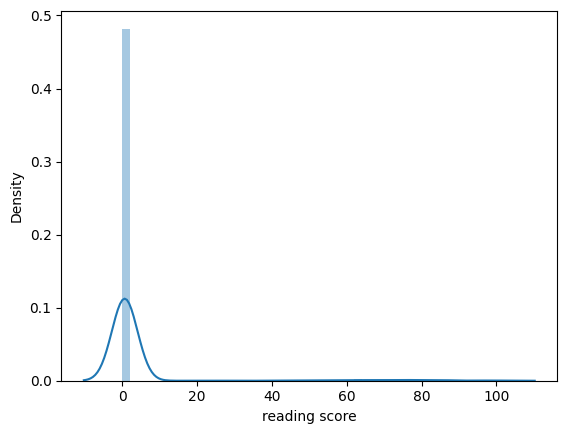

In [154]:
sns.distplot(df['reading score'])

/tmp/ipykernel_11187/2098642538.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['writing score'])


<AxesSubplot: xlabel='writing score', ylabel='Density'>

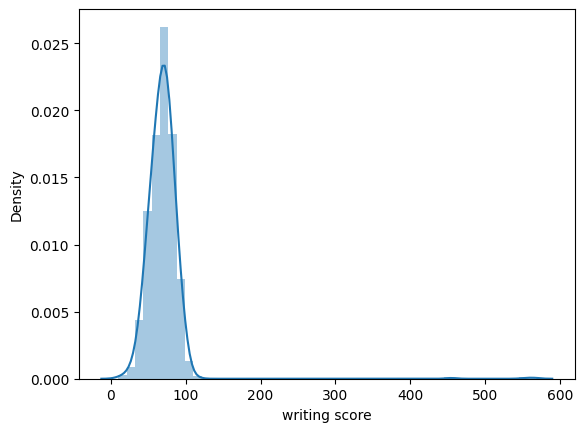

In [155]:
sns.distplot(df['writing score'])


In [156]:
#normalizing 
min1=df['writing score'].min()
max1=df['writing score'].max()
for i,value in enumerate(df['writing score']):
    df['writing score'][i]=((value-min1)/(max1-min1))*(1-0)+0

/tmp/ipykernel_11187/1028756260.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['writing score'][i]=((value-min1)/(max1-min1))*(1-0)+0
/tmp/ipykernel_11187/1028756260.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['writing score'][i]=((value-min1)/(max1-min1))*(1-0)+0
/tmp/ipykernel_11187/1028756260.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['writing score'][i]=((value-min1)/(max1-min1))*(1-0)+0
/tmp/ipykerne

/tmp/ipykernel_11187/668233639.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['writing score'])


<AxesSubplot: xlabel='writing score', ylabel='Density'>

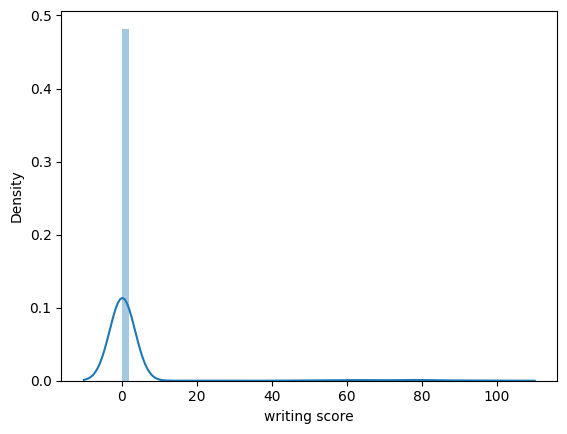

In [157]:
sns.distplot(df['writing score'])

#### df.skew(axis = 0, skipna = True)